## Описание проекта
Напомним, что вам предстоит выяснить, от каких самых малоприбыльных рейсов из Анапы мы можем отказаться в зимнее время. Вы не знаете, по каким критериям ваше руководство будет отбирать рейсы, поэтому решаете собрать как можно больше информации, содержащейся в вашей базе, в один датасет. 

Исходя из того, что прибыльность рейса — это разница между доходом от продаж билетов и расходом на полет, соберите такой датасет, который позволит оценить эти цифры. 

Самая простая модель оценки прибыльности: стоимость билетов - стоимость топлива на рейс (для оценки последнего вам необходим километраж рейса или длительность полета), но вы можете предложить другую модель.

Ваш датасет должен обязательно включать id рейса и города вылета (Анапа) и прилета. Он также  может включать такие данные, как модель самолёта и его характеристики, суммарную стоимость всех билетов на рейсе, затраченное время в полёте и прочее — на ваше усмотрение.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

import datetime as dt
from datetime import datetime, timedelta

df_raw = pd.read_csv('flights.csv')
df = df_raw.copy()

#приведем время вылета и время прилета к формату datetime
df['actual_departure'] = pd.to_datetime(df['actual_departure'])
df['actual_arrival'] = pd.to_datetime(df['actual_arrival'])

df

,flight_id,aircraft_model,departure_city,arrival_city,actual_departure,day_of_week,actual_arrival,flight_duration_minutes,aircraft_capacity,sold_seats,amount_flight
0,136119,Boeing 737-300,Anapa,Moscow,2017-01-03 10:08:00+00:00,2.0,2017-01-03 11:49:00+00:00,101.0,130,113.0,1653000.0
1,136120,Boeing 737-300,Anapa,Moscow,2017-02-24 10:07:00+00:00,5.0,2017-02-24 11:46:00+00:00,99.0,130,109.0,1605400.0
2,136122,Boeing 737-300,Anapa,Moscow,2017-01-08 10:08:00+00:00,7.0,2017-01-08 11:48:00+00:00,100.0,130,97.0,1431000.0
3,136130,Boeing 737-300,Anapa,Moscow,2017-02-13 10:07:00+00:00,1.0,2017-02-13 11:46:00+00:00,99.0,130,107.0,1556600.0
4,136131,Boeing 737-300,Anapa,Moscow,2017-01-28 10:07:00+00:00,6.0,2017-01-28 11:46:00+00:00,99.0,130,124.0,1812800.0
...,...,...,...,...,...,...,...,...,...,...,...
122,136936,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-02 09:28:00+00:00,1.0,2017-01-02 10:18:00+00:00,50.0,97,82.0,632400.0
123,136937,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-03 09:29:00+00:00,2.0,2017-01-03 10:19:00+00:00,50.0,97,81.0,626100.0
124,136951,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-02 09:28:00+00:00,4.0,2017-02-02 10:17:00+00:00,49.0,97,90.0,720600.0
125,136953,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-27 09:27:00+00:00,1.0,2017-02-27 10:17:00+00:00,50.0,97,97.0,765300.0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   flight_id                127 non-null    int64              
 1   aircraft_model           127 non-null    object             
 2   departure_city           127 non-null    object             
 3   arrival_city             127 non-null    object             
 4   actual_departure         127 non-null    datetime64[ns, UTC]
 5   day_of_week              127 non-null    float64            
 6   actual_arrival           127 non-null    datetime64[ns, UTC]
 7   flight_duration_minutes  127 non-null    float64            
 8   aircraft_capacity        127 non-null    int64              
 9   sold_seats               118 non-null    float64            
 10  amount_flight            118 non-null    float64            
dtypes: datetime64[ns, UTC](2), float

В базе данных есть информация о 127 перелетах в зимнее время года в 2017 году из Анапы в Москву. Но есть по 9 пропущенных значений.
Посмотрим, что за пропущенные значения:

In [56]:
df[df.isnull().any(1)]

,flight_id,aircraft_model,departure_city,arrival_city,actual_departure,day_of_week,actual_arrival,flight_duration_minutes,aircraft_capacity,sold_seats,amount_flight
59,136511,Boeing 737-300,Anapa,Novokuznetsk,2017-02-21 06:15:00+00:00,2.0,2017-02-21 11:25:00+00:00,310.0,130,NaN,NaN
60,136513,Boeing 737-300,Anapa,Novokuznetsk,2017-02-28 06:13:00+00:00,2.0,2017-02-28 11:23:00+00:00,310.0,130,NaN,NaN
61,136514,Boeing 737-300,Anapa,Novokuznetsk,2017-02-07 06:14:00+00:00,2.0,2017-02-07 11:13:00+00:00,299.0,130,NaN,NaN
62,136523,Boeing 737-300,Anapa,Novokuznetsk,2017-01-10 06:14:00+00:00,2.0,2017-01-10 11:26:00+00:00,312.0,130,NaN,NaN
63,136540,Boeing 737-300,Anapa,Novokuznetsk,2017-01-17 06:14:00+00:00,2.0,2017-01-17 11:21:00+00:00,307.0,130,NaN,NaN
64,136544,Boeing 737-300,Anapa,Novokuznetsk,2017-01-31 06:10:00+00:00,2.0,2017-01-31 11:14:00+00:00,304.0,130,NaN,NaN
65,136546,Boeing 737-300,Anapa,Novokuznetsk,2017-01-03 06:13:00+00:00,2.0,2017-01-03 11:15:00+00:00,302.0,130,NaN,NaN
66,136560,Boeing 737-300,Anapa,Novokuznetsk,2017-01-24 06:13:00+00:00,2.0,2017-01-24 11:18:00+00:00,305.0,130,NaN,NaN
67,136567,Boeing 737-300,Anapa,Novokuznetsk,2017-02-14 06:12:00+00:00,2.0,2017-02-14 11:23:00+00:00,311.0,130,NaN,NaN


<AxesSubplot:title={'center':'Количество рейсов'}>

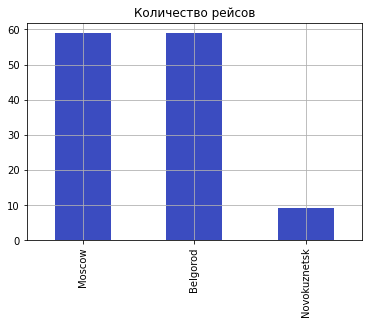

In [57]:
df['arrival_city'].value_counts().plot(kind = 'bar',
                             grid = True, 
                             colormap = 'coolwarm',
                             title = 'Количество рейсов')

Это все рейсы из Анапы в Новокузнецк. В базе данных, которая была дана для анализа, отсутствует информация о проданных местах на эти рейсы. Удалим строки с рейсами в этом направлении.

In [58]:
df = df.dropna(axis=0)

In [59]:
# сразу переведем sold_seats в целочисленный тип данных
df['sold_seats'] = df['sold_seats'].astype('int64')

В базе есть признак day_of_week со значениями от 1 до 7, где 1 - это понедельник, 7 - воскресенье. Сделаем для каждого такого значения человекочитаемый вид:

In [60]:
# создание словаря
dict_days = {
    1.0: 'понедельник', 
    2.0: 'вторник', 
    3.0: 'среда',
    4.0: 'четверг',
    5.0: 'пятница',
    6.0: 'суббота',
    7.0: 'воскресенье'
}

# заполнение столбца day_of_week значениями словаря
df['day_of_week'] = df['day_of_week'].map(dict_days)

Интересно будет посмотреть статистику в разрезе по месяцам. Выведем месяц в отдельный столбец:

In [61]:
df['month'] = pd.DatetimeIndex(df['actual_departure']).month

In [62]:
# создание словаря
dict_month = {
    1.0: 'январь', 
    2.0: 'февраль', 
    12.0: 'декабрь'
}

# заполнение столбца month значениями словаря
df['month'] = df['month'].map(dict_month)

In [63]:
df

,flight_id,aircraft_model,departure_city,arrival_city,actual_departure,day_of_week,actual_arrival,flight_duration_minutes,aircraft_capacity,sold_seats,amount_flight,month
0,136119,Boeing 737-300,Anapa,Moscow,2017-01-03 10:08:00+00:00,вторник,2017-01-03 11:49:00+00:00,101.0,130,113,1653000.0,январь
1,136120,Boeing 737-300,Anapa,Moscow,2017-02-24 10:07:00+00:00,пятница,2017-02-24 11:46:00+00:00,99.0,130,109,1605400.0,февраль
2,136122,Boeing 737-300,Anapa,Moscow,2017-01-08 10:08:00+00:00,воскресенье,2017-01-08 11:48:00+00:00,100.0,130,97,1431000.0,январь
3,136130,Boeing 737-300,Anapa,Moscow,2017-02-13 10:07:00+00:00,понедельник,2017-02-13 11:46:00+00:00,99.0,130,107,1556600.0,февраль
4,136131,Boeing 737-300,Anapa,Moscow,2017-01-28 10:07:00+00:00,суббота,2017-01-28 11:46:00+00:00,99.0,130,124,1812800.0,январь
...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-02 09:28:00+00:00,понедельник,2017-01-02 10:18:00+00:00,50.0,97,82,632400.0,январь
123,136937,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-03 09:29:00+00:00,вторник,2017-01-03 10:19:00+00:00,50.0,97,81,626100.0,январь
124,136951,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-02 09:28:00+00:00,четверг,2017-02-02 10:17:00+00:00,49.0,97,90,720600.0,февраль
125,136953,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-27 09:27:00+00:00,понедельник,2017-02-27 10:17:00+00:00,50.0,97,97,765300.0,февраль


<AxesSubplot:xlabel='month', ylabel='amount_flight'>

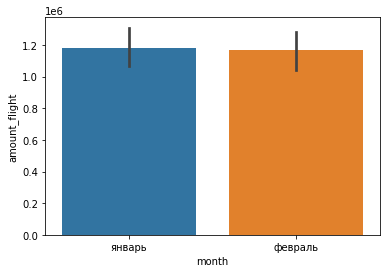

In [64]:
sns.barplot(data=df, x="month", y='amount_flight')

### Feature Engeneering
Для оценки прибыльности рейсов нам потребуется узнать расходы на полет. В нашем случае сделаем это через дальность полета и стоимость топлива.
Для начала добавим в таблицу расход топлива каждой модели самолета.

- Boeing 737-300 расходует 2600 л/ч = 43 л/мин (источник https://autogearspb.ru/zapchasti/bystryj-otvet-skolko-samolet-tratit-topliva-na-100-km.html) 
- Sukhoi Superjet-100 расходует 1700 кг/ч = 2125 л/ч = 35 л/мин (перевод в литры/час был сделан через калькулятор https://www.center-pss.ru/math/litrivkg/kerosin.htm; информация о расходе топлива http://superjet.wikidot.com/wiki:rashod-topliva) 


In [65]:
dict_fuel_consumption = {
    'Boeing 737-300': 43,
    'Sukhoi Superjet-100': 35  
}
df['fuel_consumption'] = df.aircraft_model.map(dict_fuel_consumption)

Добавим столбец, в котором посчитаем общее количество денег, затраченное на полет = (л/мин * длительность полета в минутах * стоимость литра авиационного топлива). А также столбец с прибылью за этот рейс.

In [66]:
df['money_consumption'] = df['flight_duration_minutes']*df['fuel_consumption']*42

In [67]:
df['profit'] = df['amount_flight'] - df['money_consumption']

In [68]:
df

,flight_id,aircraft_model,departure_city,arrival_city,actual_departure,day_of_week,actual_arrival,flight_duration_minutes,aircraft_capacity,sold_seats,amount_flight,month,fuel_consumption,money_consumption,profit
0,136119,Boeing 737-300,Anapa,Moscow,2017-01-03 10:08:00+00:00,вторник,2017-01-03 11:49:00+00:00,101.0,130,113,1653000.0,январь,43,182406.0,1470594.0
1,136120,Boeing 737-300,Anapa,Moscow,2017-02-24 10:07:00+00:00,пятница,2017-02-24 11:46:00+00:00,99.0,130,109,1605400.0,февраль,43,178794.0,1426606.0
2,136122,Boeing 737-300,Anapa,Moscow,2017-01-08 10:08:00+00:00,воскресенье,2017-01-08 11:48:00+00:00,100.0,130,97,1431000.0,январь,43,180600.0,1250400.0
3,136130,Boeing 737-300,Anapa,Moscow,2017-02-13 10:07:00+00:00,понедельник,2017-02-13 11:46:00+00:00,99.0,130,107,1556600.0,февраль,43,178794.0,1377806.0
4,136131,Boeing 737-300,Anapa,Moscow,2017-01-28 10:07:00+00:00,суббота,2017-01-28 11:46:00+00:00,99.0,130,124,1812800.0,январь,43,178794.0,1634006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-02 09:28:00+00:00,понедельник,2017-01-02 10:18:00+00:00,50.0,97,82,632400.0,январь,35,73500.0,558900.0
123,136937,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-03 09:29:00+00:00,вторник,2017-01-03 10:19:00+00:00,50.0,97,81,626100.0,январь,35,73500.0,552600.0
124,136951,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-02 09:28:00+00:00,четверг,2017-02-02 10:17:00+00:00,49.0,97,90,720600.0,февраль,35,72030.0,648570.0
125,136953,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-27 09:27:00+00:00,понедельник,2017-02-27 10:17:00+00:00,50.0,97,97,765300.0,февраль,35,73500.0,691800.0


Важно будет узнать процент заполненности самолета на рейсе, то есть какое количество мест занято на рейсе из общего количество мест в самолете. Если самолет заполнен менее чем на 75%, нужно обратить повышенное внимание на такие рейсы. Источник — https://www.kommersant.ru/doc/3246832

In [69]:
df['fullness'] = round((df['sold_seats']*100)/df['aircraft_capacity'])

Посчитаем среднюю прибыльность рейсов для Boeing 737-300:

In [70]:
df_avg_profit_Boeing = round(df[df['aircraft_model'] == 'Boeing 737-300']['profit'].mean())
df_avg_profit_Boeing

1462282

Посчитаем среднюю прибыльность рейсов для Sukhoi Superjet-100:

In [71]:
df_avg_profit_su = round(df[df['aircraft_model'] == 'Sukhoi Superjet-100']['profit'].mean())
df_avg_profit_su

636811

Добавим в датасет колонку со средней прибыльностью для каждого рейса на этом самолете:

In [72]:
def add_avg_profit(s):
    if s == 'Boeing 737-300':
        return df_avg_profit_Boeing
    elif s == 'Sukhoi Superjet-100':
        return df_avg_profit_su
df['avg_profit'] = df.aircraft_model.apply(add_avg_profit)

In [73]:
df

,flight_id,aircraft_model,departure_city,arrival_city,actual_departure,day_of_week,actual_arrival,flight_duration_minutes,aircraft_capacity,sold_seats,amount_flight,month,fuel_consumption,money_consumption,profit,fullness,avg_profit
0,136119,Boeing 737-300,Anapa,Moscow,2017-01-03 10:08:00+00:00,вторник,2017-01-03 11:49:00+00:00,101.0,130,113,1653000.0,январь,43,182406.0,1470594.0,87.0,1462282
1,136120,Boeing 737-300,Anapa,Moscow,2017-02-24 10:07:00+00:00,пятница,2017-02-24 11:46:00+00:00,99.0,130,109,1605400.0,февраль,43,178794.0,1426606.0,84.0,1462282
2,136122,Boeing 737-300,Anapa,Moscow,2017-01-08 10:08:00+00:00,воскресенье,2017-01-08 11:48:00+00:00,100.0,130,97,1431000.0,январь,43,180600.0,1250400.0,75.0,1462282
3,136130,Boeing 737-300,Anapa,Moscow,2017-02-13 10:07:00+00:00,понедельник,2017-02-13 11:46:00+00:00,99.0,130,107,1556600.0,февраль,43,178794.0,1377806.0,82.0,1462282
4,136131,Boeing 737-300,Anapa,Moscow,2017-01-28 10:07:00+00:00,суббота,2017-01-28 11:46:00+00:00,99.0,130,124,1812800.0,январь,43,178794.0,1634006.0,95.0,1462282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-02 09:28:00+00:00,понедельник,2017-01-02 10:18:00+00:00,50.0,97,82,632400.0,январь,35,73500.0,558900.0,85.0,636811
123,136937,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-03 09:29:00+00:00,вторник,2017-01-03 10:19:00+00:00,50.0,97,81,626100.0,январь,35,73500.0,552600.0,84.0,636811
124,136951,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-02 09:28:00+00:00,четверг,2017-02-02 10:17:00+00:00,49.0,97,90,720600.0,февраль,35,72030.0,648570.0,93.0,636811
125,136953,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-27 09:27:00+00:00,понедельник,2017-02-27 10:17:00+00:00,50.0,97,97,765300.0,февраль,35,73500.0,691800.0,100.0,636811


Посмотрим на датасет, где прибыль за рейс меньше средней прибыли рейса на этом самолете.

In [74]:
df_new = df[df.profit < df.avg_profit].sort_values(
    ['profit'], ascending=True)
df_new

,flight_id,aircraft_model,departure_city,arrival_city,actual_departure,day_of_week,actual_arrival,flight_duration_minutes,aircraft_capacity,sold_seats,amount_flight,month,fuel_consumption,money_consumption,profit,fullness,avg_profit
102,136807,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-23 09:28:00+00:00,четверг,2017-02-23 10:18:00+00:00,50.0,97,68,531000.0,февраль,35,73500.0,457500.0,70.0,636811
77,136642,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-30 09:28:00+00:00,понедельник,2017-01-30 10:17:00+00:00,49.0,97,64,531000.0,январь,35,72030.0,458970.0,66.0,636811
109,136844,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-28 09:26:00+00:00,вторник,2017-02-28 10:16:00+00:00,50.0,97,79,575100.0,февраль,35,73500.0,501600.0,81.0,636811
116,136887,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-20 09:30:00+00:00,пятница,2017-01-20 10:19:00+00:00,49.0,97,78,595200.0,январь,35,72030.0,523170.0,80.0,636811
120,136922,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-11 09:27:00+00:00,суббота,2017-02-11 10:17:00+00:00,50.0,97,76,607800.0,февраль,35,73500.0,534300.0,78.0,636811
74,136620,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-17 09:30:00+00:00,пятница,2017-02-17 10:19:00+00:00,49.0,97,79,613500.0,февраль,35,72030.0,541470.0,81.0,636811
105,136823,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-05 09:27:00+00:00,воскресенье,2017-02-05 10:18:00+00:00,51.0,97,78,620400.0,февраль,35,74970.0,545430.0,80.0,636811
123,136937,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-03 09:29:00+00:00,вторник,2017-01-03 10:19:00+00:00,50.0,97,81,626100.0,январь,35,73500.0,552600.0,84.0,636811
117,136888,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-14 09:29:00+00:00,вторник,2017-02-14 10:19:00+00:00,50.0,97,79,626100.0,февраль,35,73500.0,552600.0,81.0,636811
86,136678,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-28 09:27:00+00:00,суббота,2017-01-28 10:17:00+00:00,50.0,97,80,631200.0,январь,35,73500.0,557700.0,82.0,636811


### Визуализация


Посмотрим, как распределяется прибыль между рейсами по городам в разрезе самолетов

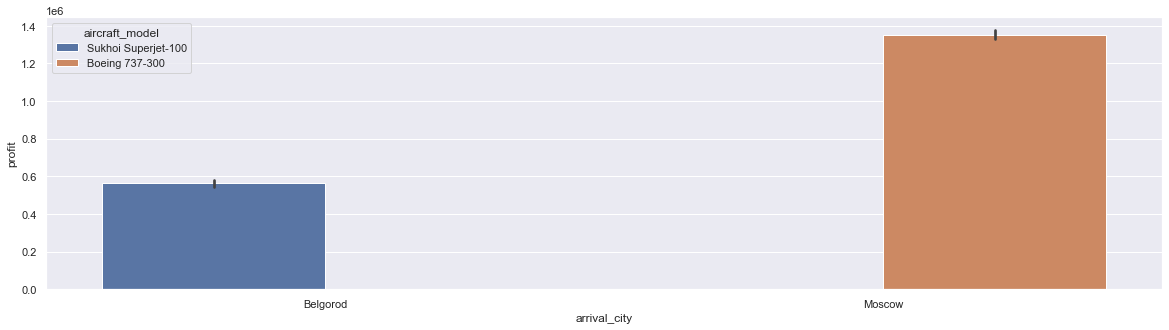

In [76]:
sns.barplot(x="arrival_city", y="profit", hue="aircraft_model", data=df_new);

Посмотрим, как заполняются салоны самолетов в зависимости от самолета и дня недели:

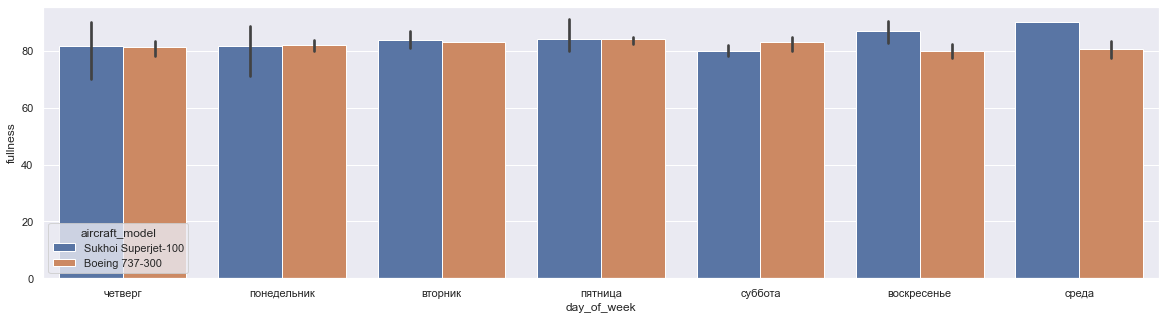

In [77]:
sns.barplot(x="day_of_week", y="fullness", hue="aircraft_model", data=df_new);

У меня было предположение, что по каким-то дням неделям люди предпочитают летать чаще, а по каким-то - реже. Но графики это опровергли — самолеты заполняются примерно одинаково не зависимо от дней недели.

Давайте отфильтруем дата сет по тем рейсам, у кого заполненность менее 75%:

In [137]:
df_new = df_new[df_new.fullness < 75].sort_values(
    ['fullness'], ascending=True)
df_new

,flight_id,aircraft_model,departure_city,arrival_city,actual_departure,day_of_week,actual_arrival,flight_duration_minutes,aircraft_capacity,sold_seats,amount_flight,fuel_consumption,money_consumption,profit,fullness,avg_profit
77,136642,Sukhoi Superjet-100,Anapa,Belgorod,2017-01-30 09:28:00+00:00,понедельник,2017-01-30 10:17:00+00:00,49.0,97,64,531000.0,35,72030.0,458970.0,66.0,636811
102,136807,Sukhoi Superjet-100,Anapa,Belgorod,2017-02-23 09:28:00+00:00,четверг,2017-02-23 10:18:00+00:00,50.0,97,68,531000.0,35,73500.0,457500.0,70.0,636811


### Итоги

Рекомендация Руководителю авиакомпании - стоит обратить внимание на рейсы самолета Sukhoi Superjet-100	из Анапы в Белгород по понедельникам и четвергам (id = 136642; id = 136807), их заполняемость менее 75%, а прибыль меньше средней прибыли по этим рейсам.